<a href="https://colab.research.google.com/github/kurtsenol/Text-Classification/blob/main/method_clf_sl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !python -m spacy download en_core_web_md

In [ ]:
# # spaCy
# import spacy
# nlp = spacy.load('en_core_web_md')
# # nlp = spacy.load('en_core_web_sm')

In [ ]:
!pip3 install pickle5

     |████████████████████████████████| 133kB 6.4MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219290 sha256=6c14377e3b59a02e7a14664e6b13e8baad4a48f630a4493cb34355ccdccecbc0
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:
import os
import numpy as np
import pandas as pd
import pickle5 as pickle
import re
import random

In [ ]:
df_method =pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/df_method.pkl")
df_method

,JO,AU,TI,PY,DI,QUANTITATIVE,Method,category,CMB,CMV,MB,MV,MSD,MR,SR,SED,MED,TSM,TLD,PSM,MSM,A,C,CBQO,DBQ,UEB,HSF,PSD,MV.1,GFS,DMLMF,SULMF
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,0,phenomenology,CMB-free,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,1,secondary data,CMB-free,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,0,review,CMB-free,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,1,experimental,CMB-free,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,JHMM,"de Leaniz, PMG; Rodriguez, IRD",Exploring the Antecedents of Hotel Customer Lo...,2015.0,10.1080/19368623.2014.891961,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3265,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",Casual Dining on the French Riviera: Examining...,2015.0,10.1080/19368623.2014.859114,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3266,JHMM,"Morosan, C",The Influence of DMO Advertising on Specific D...,2015.0,10.1080/19368623.2014.891962,1,survey,CMB-risk,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3267,JHMM,"Memarzadeh, F; Chang, HJ",Online Consumer Complaints About Southeast Asi...,2015.0,10.1080/19368623.2014.893222,0,content analysis,CMB-free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/df_all_final.pkl", "rb") as fh:
  df = pickle.load(fh)

In [ ]:
df

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN,\nMETHOD\nMeasures\nSignificant discrepant res...
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN,\nMETHOD\nSample and Data Collection\nBecause ...
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN,\nMETHOD\nData Collection\nManagement from 13 ...
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN,\nMETHOD\nSample\nAn experimental design was e...


In [ ]:
df.dropna(subset=["methodology"], inplace=True)

In [ ]:
df

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019.0,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019.0,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019.0,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019.0,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019.0,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...
3264,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010.0,10.1177/1096348009344234,NaN,NaN,\nMETHOD\nMeasures\nSignificant discrepant res...
3265,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010.0,10.1177/1096348009344235,NaN,NaN,\nMETHOD\nSample and Data Collection\nBecause ...
3266,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010.0,10.1177/1096348009349816,NaN,NaN,\nMETHOD\nData Collection\nManagement from 13 ...
3267,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010.0,10.1177/1096348009349817,NaN,NaN,\nMETHOD\nSample\nAn experimental design was e...


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df["PY"].fillna(2010, inplace=True)

In [ ]:
df["PY"] = df.PY.astype("int")

In [ ]:
df.isnull().sum()

JO              0
AU              0
TI              0
PY              0
DI              1
urls           83
filename       84
methodology     0
dtype: int64

In [ ]:
df.drop_duplicates(subset="TI")

,JO,AU,TI,PY,DI,urls,filename,methodology
0,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",Towards a hierarchy of hotel guests' in-room n...,2019,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,IJCHM,"Benitez-Aurioles, B",Barcelona's peer-to-peer tourist accommodation...,2019,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
2,IJCHM,"Hu, XB; Yang, Y; Park, S",A meta-regression on the effect of online rati...,2019,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",Examining work factors after Malaysia's minimu...,2019,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,IJCHM,"Kim, EL; Tanford, S",Seeking reward or avoiding risk from restauran...,2019,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...
3071,JHTR,"Kim, W; Ok, C",CUSTOMER ORIENTATION OF SERVICE EMPLOYEES AND ...,2010,10.1177/1096348009344234,NaN,NaN,\nMETHOD\nMeasures\nSignificant discrepant res...
3072,JHTR,"Gazzoli, G; Hancer, M; Park, Y",THE ROLE AND EFFECT OF JOB SATISFACTION AND EM...,2010,10.1177/1096348009344235,NaN,NaN,\nMETHOD\nSample and Data Collection\nBecause ...
3073,JHTR,"Young, CA; Corsun, DL","BURNED! THE IMPACT OF WORK ASPECTS, INJURY, AN...",2010,10.1177/1096348009349816,NaN,NaN,\nMETHOD\nData Collection\nManagement from 13 ...
3074,JHTR,"Kim, DY; Wen, L; Doh, K",DOES CULTURAL DIFFERENCE AFFECT CUSTOMER'S RES...,2010,10.1177/1096348009349817,NaN,NaN,\nMETHOD\nSample\nAn experimental design was e...


In [ ]:
df_merged = pd.merge(df_method[["TI", "QUANTITATIVE", "Method"]], df, left_on="TI", right_on="TI")
df_merged

,TI,QUANTITATIVE,Method,JO,AU,PY,DI,urls,filename,methodology
0,Towards a hierarchy of hotel guests' in-room n...,0,phenomenology,IJCHM,"Ineson, EM; Comic, D; Kalmic, L",2019,10.1108/IJCHM-01-2019-0061,https://www.emerald.com/insight/content/doi/10...,IJCHM_0.txt,Methodology\nThe design is qualitative and exp...
1,Barcelona's peer-to-peer tourist accommodation...,1,secondary data,IJCHM,"Benitez-Aurioles, B",2019,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
2,A meta-regression on the effect of online rati...,0,review,IJCHM,"Hu, XB; Yang, Y; Park, S",2019,10.1108/IJCHM-10-2018-0835,https://www.emerald.com/insight/content/doi/10...,IJCHM_2.txt,3. Research method\nWe searched the empirical ...
3,Examining work factors after Malaysia's minimu...,1,survey,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",2019,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,Seeking reward or avoiding risk from restauran...,1,experimental,IJCHM,"Kim, EL; Tanford, S",2019,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
...,...,...,...,...,...,...,...,...,...,...
3071,"Attitudes, Perceptions, and Responses of Purch...",1,survey,JHMM,"Ong, BS",2015,10.1080/19368623.2014.901201,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_223.txt,\nMETHODOLOGY\nGiven that daily deals are Inte...
3072,Exploring the Antecedents of Hotel Customer Lo...,1,survey,JHMM,"de Leaniz, PMG; Rodriguez, IRD",2015,10.1080/19368623.2014.891961,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_224.txt,\nMETHOD OF ANALYSIS\nData Collection and Samp...
3073,Casual Dining on the French Riviera: Examining...,1,survey,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",2015,10.1080/19368623.2014.859114,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_225.txt,\nMETHODOLOGY\nThe Study Site\nThe French Rivi...
3074,The Influence of DMO Advertising on Specific D...,1,survey,JHMM,"Morosan, C",2015,10.1080/19368623.2014.891962,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_226.txt,\nMETHODOLOGY\nInstrument Development\nThe res...


In [ ]:
df_merged.isnull().sum()

TI               0
QUANTITATIVE     0
Method           0
JO               0
AU               0
PY               0
DI               1
urls            83
filename        84
methodology      0
dtype: int64

In [ ]:
df_merged.Method.value_counts()

survey               1511
secondary data        525
experimental          346
qualitative           177
mixed                 112
content analysis      104
case study             99
review                 76
scale development      38
bibliometric           18
grounded theory        16
phenomenology          15
theoretical            11
meta-analysis           7
ethnography             6
sna                     5
textual analysis        4
delphi                  3
field study             1
interview               1
research note           1
Name: Method, dtype: int64

In [ ]:
df_filtered = df_merged.groupby("Method").filter(lambda x: len(x)>100)
df_filtered

,TI,QUANTITATIVE,Method,JO,AU,PY,DI,urls,filename,methodology
1,Barcelona's peer-to-peer tourist accommodation...,1,secondary data,IJCHM,"Benitez-Aurioles, B",2019,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...
3,Examining work factors after Malaysia's minimu...,1,survey,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",2019,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...
4,Seeking reward or avoiding risk from restauran...,1,experimental,IJCHM,"Kim, EL; Tanford, S",2019,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...
5,Prices of short-stay accommodation: time serie...,1,secondary data,IJCHM,"Gricar, S; Bojnec, S",2019,10.1108/IJCHM-01-2019-0091,https://www.emerald.com/insight/content/doi/10...,IJCHM_5.txt,Empirical setting\nIn terms of relevant econom...
6,How do online reviewers' cultural traits and p...,1,content analysis,IJCHM,"Mariani, M; Predvoditeleva, M",2019,10.1108/IJCHM-11-2018-0927,https://www.emerald.com/insight/content/doi/10...,IJCHM_7.txt,"3. Research setting, design and methodology\n3..."
...,...,...,...,...,...,...,...,...,...,...
3071,"Attitudes, Perceptions, and Responses of Purch...",1,survey,JHMM,"Ong, BS",2015,10.1080/19368623.2014.901201,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_223.txt,\nMETHODOLOGY\nGiven that daily deals are Inte...
3072,Exploring the Antecedents of Hotel Customer Lo...,1,survey,JHMM,"de Leaniz, PMG; Rodriguez, IRD",2015,10.1080/19368623.2014.891961,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_224.txt,\nMETHOD OF ANALYSIS\nData Collection and Samp...
3073,Casual Dining on the French Riviera: Examining...,1,survey,JHMM,"Prayag, G; Khoo-Lattimore, C; Sitruk, J",2015,10.1080/19368623.2014.859114,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_225.txt,\nMETHODOLOGY\nThe Study Site\nThe French Rivi...
3074,The Influence of DMO Advertising on Specific D...,1,survey,JHMM,"Morosan, C",2015,10.1080/19368623.2014.891962,https://www.tandfonline.com/doi/full/10.1080/1...,JHMM_226.txt,\nMETHODOLOGY\nInstrument Development\nThe res...


In [ ]:
df_filtered = df_filtered[df_filtered.Method!="mixed"]

In [ ]:
len(df_filtered)

2663

In [ ]:
df_filtered.Method.value_counts()

survey              1511
secondary data       525
experimental         346
qualitative          177
content analysis     104
Name: Method, dtype: int64

In [ ]:
df_filtered.Method.value_counts(normalize=True)

survey              0.567405
secondary data      0.197146
experimental        0.129929
qualitative         0.066466
content analysis    0.039054
Name: Method, dtype: float64

In [ ]:
df_filtered['method_id'] = df_filtered['Method'].factorize()[0]
# category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
# category_to_id = dict(category_id_df.values)
# id_to_category = dict(category_id_df[['category_id', 'Product']].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_filtered.head()

,TI,QUANTITATIVE,Method,JO,AU,PY,DI,urls,filename,methodology,method_id
1,Barcelona's peer-to-peer tourist accommodation...,1,secondary data,IJCHM,"Benitez-Aurioles, B",2019,10.1108/IJCHM-01-2019-0090,https://www.emerald.com/insight/content/doi/10...,IJCHM_1.txt,Data\nThere are no official statistics on the ...,0
3,Examining work factors after Malaysia's minimu...,1,survey,IJCHM,"Ahmat, NHC; Arendt, SW; Russell, DW",2019,10.1108/IJCHM-10-2018-0827,https://www.emerald.com/insight/content/doi/10...,IJCHM_3.txt,Methods\nParticipants\nEmployees from operatio...,1
4,Seeking reward or avoiding risk from restauran...,1,experimental,IJCHM,"Kim, EL; Tanford, S",2019,10.1108/IJCHM-03-2018-0235,https://www.emerald.com/insight/content/doi/10...,IJCHM_4.txt,Method\nDesign\nParticipants made dining decis...,2
5,Prices of short-stay accommodation: time serie...,1,secondary data,IJCHM,"Gricar, S; Bojnec, S",2019,10.1108/IJCHM-01-2019-0091,https://www.emerald.com/insight/content/doi/10...,IJCHM_5.txt,Empirical setting\nIn terms of relevant econom...,0
6,How do online reviewers' cultural traits and p...,1,content analysis,IJCHM,"Mariani, M; Predvoditeleva, M",2019,10.1108/IJCHM-11-2018-0927,https://www.emerald.com/insight/content/doi/10...,IJCHM_7.txt,"3. Research setting, design and methodology\n3...",3


In [ ]:
method_id_df = df_filtered[['Method', 'method_id']].drop_duplicates().sort_values('method_id')
method_to_id = dict(method_id_df.values)
method_to_id

{'content analysis': 3,
 'experimental': 2,
 'qualitative': 4,
 'secondary data': 0,
 'survey': 1}

In [ ]:
id_to_method = dict(method_id_df[['method_id', 'Method']].values)
id_to_method

{0: 'secondary data',
 1: 'survey',
 2: 'experimental',
 3: 'content analysis',
 4: 'qualitative'}

In [ ]:
# N= int(len(df_filtered) * 0.95)
# N

In [ ]:
# df_train = df_filtered.groupby('Method', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df_filtered))))).sample(frac=1).reset_index(drop=True)
# df_train

In [ ]:
# df_valid = df_filtered[~df_filtered.TI.isin(df_train.TI)]
# df_valid

In [ ]:
# df_valid.Method.value_counts(normalize=True)

* sublinear_df is set to True to use a logarithmic form for frequency.
* min_df is the minimum numbers of documents a word must be present in to be kept.
* norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
* ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
* stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

In [ ]:
df_filtered.shape

(2663, 11)

In [ ]:
# df_train.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df_filtered.methodology).toarray()
labels = df_filtered.method_id
features.shape

(2663, 44705)

Now, each of 2663 methodology sections is represented by 44705 features, representing the tf-idf score for different unigrams and bigrams.

We can use `sklearn.feature_selection.chi2` to find the terms that are the most correlated with each of the methodology:

In [ ]:
from sklearn.feature_selection import chi2

N = 5
for Product, method_id in sorted(method_to_id.items()):
  features_chi2 = chi2(features, labels == method_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
  print()

# 'content analysis':
  . Most correlated unigrams:
. krippendorff
. reviewer
. tripadvisor
. sentiment
. reviews
  . Most correlated bigrams:
. cohen kappa
. sentiment score
. sentiment analysis
. text mining
. content analysis

# 'experimental':
  . Most correlated unigrams:
. condition
. manipulation
. experiment
. scenario
. experimental
  . Most correlated bigrams:
. manipulation check
. participants randomly
. experimental conditions
. randomly assigned
. experimental design

# 'qualitative':
  . Most correlated unigrams:
. transcribed
. transcripts
. themes
. interviews
. interview
  . Most correlated bigrams:
. recorded transcribed
. qualitative research
. interview questions
. interviews conducted
. semi structured

# 'secondary data':
  . Most correlated unigrams:
. firm
. debt
. firms
. stock
. assets
  . Most correlated bigrams:
. restaurant firms
. fixed effects
. time series
. book value
. total assets

# 'survey':
  . Most correlated unigrams:
. experimental
. survey
. q

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [ ]:
# df_train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_filtered['methodology'], df_filtered['method_id'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [ ]:
clf = LinearSVC(class_weight="balanced").fit(X_train_tfidf, y_train)

In [ ]:
print(clf.predict(count_vect.transform([df_filtered.methodology.iloc[0]])))

[0]


In [ ]:
df_filtered.Method.iloc[0]

'secondary data'

In [ ]:
X_test

1052    3. Methodology\n3.1. Data collection\nTo test ...
2614    Research Design\nMethod\nThe impacts of distan...
1339    4. Methodology\nThis is a survey based, causal...
588     Method\nSamples and data collection\nThis stud...
2633    Method\nA qualitative research design was used...
                              ...                        
242     Methods\nResearch setting, sample and procedur...
2282    Study 1\nWe test the above hypotheses in Study...
1233    3. Methodology\n3.1. Samples and data\nThis st...
1279    2. Data and methods\nWe have used data on 3630...
2661    Research Methods\nThe proposed research hypoth...
Name: methodology, Length: 666, dtype: object

In [ ]:
df_eval= pd.DataFrame()
df_eval["Method"]  = y_test

In [ ]:
len(X_test)

666

In [ ]:
for i in df_eval.index:
  df_eval.loc[i, "Predicted"] = clf.predict(count_vect.transform([X_test.loc[i]]))


In [ ]:
df_eval[df_eval.Method!=df_eval.Predicted]

,Method,Predicted
1052,0,3.0
2614,0,1.0
2567,2,1.0
2519,1,0.0
2430,0,1.0
...,...,...
1701,0,1.0
1249,2,1.0
2196,3,4.0
333,0,1.0


In [ ]:
clf = LogisticRegression().fit(X_train_tfidf, y_train)

In [ ]:
df_eval= pd.DataFrame()
df_eval["Method"]  = y_test
for i in df_eval.index:
  df_eval.loc[i, "Predicted"] = clf.predict(count_vect.transform([X_test.loc[i]]))

In [ ]:
df_eval[df_eval.Method!=df_eval.Predicted]

,Method,Predicted
1052,0,1.0
2614,0,1.0
2567,2,1.0
2430,0,1.0
2627,0,1.0
...,...,...
333,0,1.0
46,2,1.0
1821,2,1.0
1233,0,1.0


In [ ]:
clf = RandomForestClassifier().fit(X_train_tfidf, y_train)

In [ ]:
df_eval= pd.DataFrame()
df_eval["Method"]  = y_test
for i in df_eval.index:
  df_eval.loc[i, "Predicted"] = clf.predict(count_vect.transform([X_test.loc[i]]))

In [ ]:
df_eval[df_eval.Method!=df_eval.Predicted]

,Method,Predicted
1052,0,1.0
2614,0,1.0
2567,2,1.0
2940,3,1.0
2427,0,1.0
...,...,...
2872,1,2.0
692,3,1.0
2196,3,1.0
1821,2,1.0


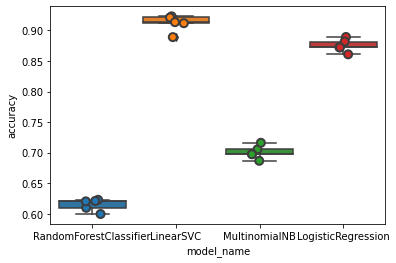

In [ ]:
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.911746
LogisticRegression        0.875322
MultinomialNB             0.700718
RandomForestClassifier    0.614717
Name: accuracy, dtype: float64

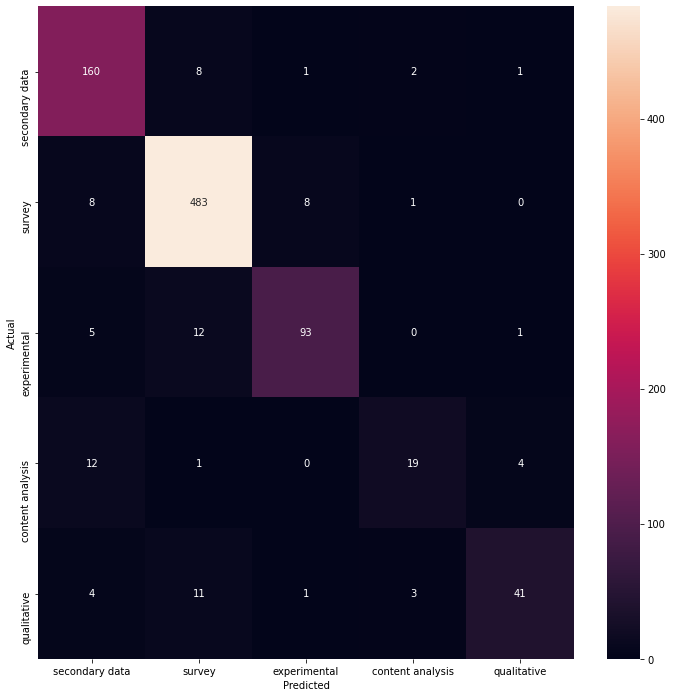

In [ ]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_filtered.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=method_id_df.Method.values, yticklabels=method_id_df.Method.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from IPython.display import display
for predicted in method_id_df.method_id:
  for actual in method_id_df.method_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_method[actual], id_to_method[predicted], conf_mat[actual, predicted]))
      display(df_filtered.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Method', 'methodology']])
      print('')

'content analysis' predicted as 'secondary data' : 12 examples.


,Method,methodology
132,content analysis,3. Methodology\nData for this study were gathe...
1055,content analysis,3. Empirical setting and research methodology\...
1494,content analysis,3. Research methods\nIn order to obtain and an...
6,content analysis,"3. Research setting, design and methodology\n3..."
1198,content analysis,3. Research method and data collection\nIn thi...
55,content analysis,Methodology\nResearch goal and methods\nThis r...
1843,content analysis,3. Hypotheses and methodology\n3.1. Research o...
1279,content analysis,2. Data and methods\nWe have used data on 3630...
3065,content analysis,\nMETHODOLOGY\nThis study aimed to identify th...
143,content analysis,3. Methodology\nMonthly data from January 1996...



'experimental' predicted as 'survey' : 12 examples.


,Method,methodology
3023,experimental,The study of tipping behavior is of interest f...
370,experimental,3. Methods\n3.1 Data collection\nFollowing the...
461,experimental,3. Methodology\nThe research method was based ...
1585,experimental,3. Methodology\nWe conducted an experimental w...
2810,experimental,Method\nData Collection and Sample\nThe critic...
1441,experimental,2. Methods\nThe study took place in a NHS hosp...
1249,experimental,3. Methodology\n3.1. Research design\nFor this...
1853,experimental,3. Methods\nTo consider positioning strategies...
2799,experimental,Empirical Framework\nThe present research anal...
1200,experimental,3. Methodology\n3.1. Research design\nThis stu...



'qualitative' predicted as 'survey' : 11 examples.


,Method,methodology
468,qualitative,3. Methodology\nGiven that casinos are an unex...
563,qualitative,"Methodology\nResearch design\nIn this study, C..."
670,qualitative,Methodology\nEmpirical research was carried ou...
1721,qualitative,5. Methodology\n5.1. Sample\nParticipants of t...
685,qualitative,Methods\nResearch site\nTo verify the applicab...
2025,qualitative,"2. Methodology\nThe study subjects, customers ..."
2363,qualitative,Method and Procedure\nGiven that the nature of...
1728,qualitative,6. Methodology\nThis study employed the Delphi...
1193,qualitative,2. Overview of past empirical research\nAlthou...
25,qualitative,Methodological implication\nThis research adop...


In [ ]:
model.fit(features, labels)
N = 5
for Product, category_id in sorted(method_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'content analysis':
  . Top unigrams:
       . reviews
       . content
       . tripadvisor
       . comments
       . reviewer
  . Top bigrams:
       . content analysis
       . number reviews
       . text mining
       . hospitality marketing
       . sentiment score
# 'experimental':
  . Top unigrams:
       . experiment
       . experimental
       . scenario
       . scenarios
       . condition
  . Top bigrams:
       . experimental design
       . randomly assigned
       . study participants
       . scenario based
       . manipulation check
# 'qualitative':
  . Top unigrams:
       . interview
       . interviews
       . interviewees
       . qualitative
       . depth
  . Top bigrams:
       . interviews conducted
       . qualitative research
       . interview questions
       . semi structured
       . recorded transcribed
# 'secondary data':
  . Top unigrams:
       . period
       . periods
       . available
       . model
       . function
  . Top bigrams:
     

In [ ]:
# Create the hyperparameter grid
param_grid =  {'C': [0.01, 0.1, 1, 2],  "class_weight":["balanced", None]}

# Instantiate classifier and GridSearchCV, fit
clf_svc = LinearSVC(random_state=21)
svc_cv = GridSearchCV(clf_svc, param_grid, cv=5, refit=True)
svc_cv.fit(X_train, y_train)

# Print the best estimator, optimal parameters and best score
print("Best Estimator: ", svc_cv.best_estimator_)
print("Tuned Parameters: {}".format(svc_cv.best_params_))
print("Tuned Score: {}".format(svc_cv.best_score_.round(3)))

Best Estimator:  LinearSVC(C=2, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=21, tol=0.0001,
          verbose=0)
Tuned Parameters: {'C': 2, 'class_weight': 'balanced'}
Tuned Score: 0.923


In [ ]:
scores_svc_cv = cross_val_score(svc_cv.best_estimator_, X_train, y_train, cv=5, scoring="accuracy")
print("mean accuracy score: ", scores_svc_cv.mean().round(3))

mean accuracy score:  0.923


In [ ]:
y_pred = svc_cv.best_estimator_.predict(X_test)
conf_mat =confusion_matrix(y_test, y_pred)
conf_mat

array([[161,   6,   0,   4,   1],
       [  8, 481,   9,   1,   1],
       [  4,  11,  95,   0,   1],
       [ 11,   1,   0,  20,   4],
       [  2,   9,   1,   5,  43]])

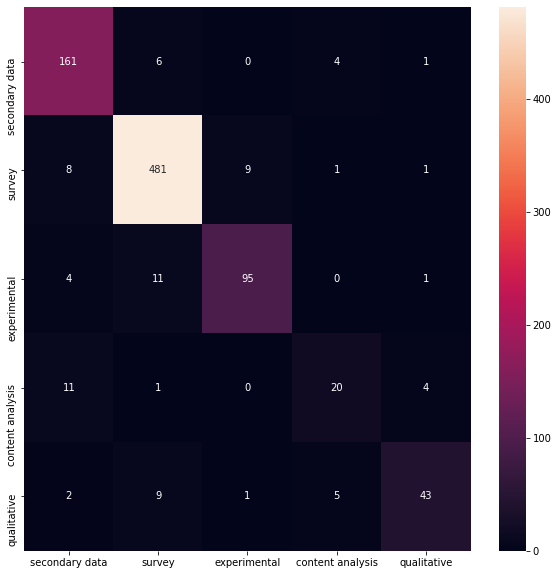

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=method_id_df.Method.values, yticklabels=method_id_df.Method.values);